In [1]:
from src.leaflet_creation import create_map_visualization
import geopandas as gp

from src.constants import fn_segments_dc
data_dir = 'data/'
path_segs_dc = data_dir + fn_segments_dc


In [2]:
segs = gp.read_file(path_segs_dc)

In [4]:
%matplotlib inline

# special case of segments
1. There are 19 circle segments
2. There are 73 pairs of segments sharing the same start and end point

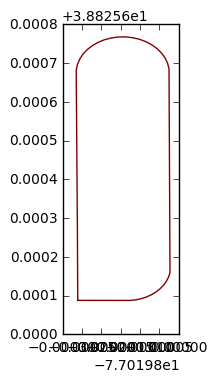

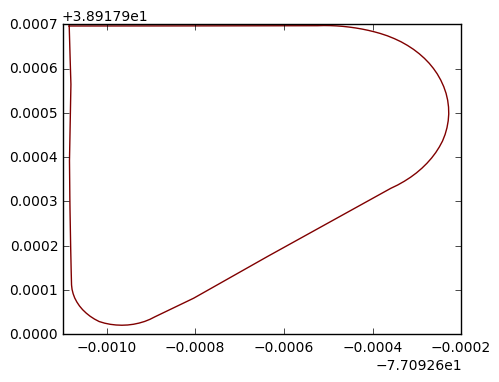

In [10]:
# total 19 circle segments
segs[segs.index.isin([12737])].plot()
segs[segs.index.isin([3111])].plot()

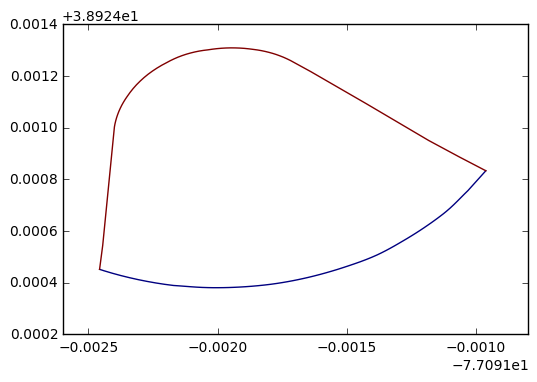

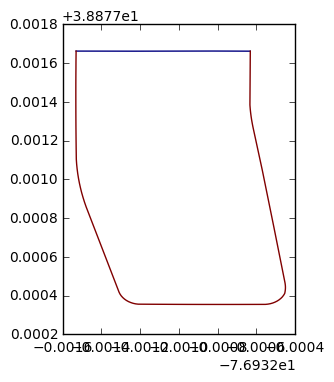

In [6]:
segs[segs.index.isin([3488, 3536])].plot()
segs[segs.index.isin([10790, 10959])].plot()

# Connectivity
a few segments are not connected in this file as they do in the real map. E.g.:
- lat lon: 38.9079018843, -77.0091881605, STREETSEGID = [46, 7841, 8573] don't connect with STREETSEGID = 7156

# understanding DIRECTIONALITY

- D=2: both direction
- D=1: the start point is the last point of the LineString
- D=0: the start point is the start point of the LineString

In [8]:
segs_d2 = segs[segs.DIRECTIONALITY==2]
segs_d1 = segs[segs.DIRECTIONALITY==1]
segs_d0 = segs[segs.DIRECTIONALITY==0]


In [9]:
html_title = 'dc segs'
file_path = ''
file_name = 'dc segs'
lon, lat  = -77.0908494, 38.9045525
zoom = 12
init_layers = ['streets', 'stsg']
map_layers = ['light','streets']
binding_data=[['stsg','street segment D=0'],['stsg1','street segment D=1'],['stsg2','street segment D=2']]
segs_d0['color'] = '#a00'
segs_d1['color'] = '#00a'
segs_d2['color'] = '#0a0'
gpdfs = [segs_d0, segs_d1, segs_d2]
create_map_visualization(html_title, file_path, file_name, lat, lon, zoom, init_layers, map_layers, binding_data, gpdfs)

d:\program files\anaconda2\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\program files\anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\program files\anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/ind

In [11]:
def segid_f_t(row):
    segid = row.STREETSEGID
    f = row.geometry.coords[0]
    t = row.geometry.coords[-1]
    return (segid, (f[1],f[0]), (t[1], t[0]))

In [15]:
def wrap_df(tuples):
    import pandas as pd
    return pd.DataFrame(tuples,columns=['segid', 'f', 't'])

In [17]:
indexes = [1070, 6454]  # same as FT in PH
wrap_df(segs_d0[segs_d0.STREETSEGID.isin(indexes)].apply(segid_f_t, axis=1).tolist())  

,segid,f,t
0,6454,"(38.8844109308, -76.9238991544)","(38.8839577495, -76.9208282939)"
1,1070,"(38.8837405311, -76.9240446306)","(38.8833646982, -76.9215865238)"


In [22]:
indexes = [8971, 10582,10475]  # same as TF in PH
indexes = [2103,2096]  # same as TF in PH
indexes = [1965]  # same as TF in PH

wrap_df(segs_d1[segs_d1.STREETSEGID.isin(indexes)].apply(segid_f_t, axis=1).tolist())  

,segid,f,t
0,1965,"(38.8928034739, -76.9558887899)","(38.8930897269, -76.9548588989)"


In [24]:
indexes = [7134]  # same as B in PH
indexes = [4482]  # same as B in PH

wrap_df(segs_d2[segs_d2.STREETSEGID.isin(indexes)].apply(segid_f_t, axis=1).tolist())  

,segid,f,t
0,7134,"(38.8939126267, -76.9548202232)","(38.8947711191, -76.9548065383)"
